## Instructions
- See deadline on the course web page
- This problem set is performed individually.See examination rules on the course web page.
- Students are allowed to discuss together and help each other when solving the problems. However, every student must understand and be able to explain his/her submitted solution. Plagiarism is not allowed (submissions will be both manually and automatically monitored).
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on.
- Many problems are automatically graded using `assert` statements. You should check that your code passes these statements without raising an `AssertionError`. Note that there might be additional, hidden tests that must be passed for full credit. In addition, some tasks are either completely manually graded or part-automatic/part-manual.
- Note that grading is performed in the teacher's python environment, which is based on the conda `environment.yml` file in the course github repo. Please avoid using additional python modules (such as `plotly`) as this might cause automatic tests to fail.

- **Important:** Hand-in is performed through the following actions:
  - Make sure to always complete **Task 0** in the header part of the notebook. 
  - Upload your solution in the form of your edited version of this jupyter notebook via the appropriate module in Canvas.
  - The name of the uploaded file **must be the same as the original one**!
  
  Note that the hand-in might not be automatically graded if you have changed the name of the uploaded file.

- Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

- Make sure that the **run time is smaller than a few minutes**. If needed you might have to reduce some computational tasks; e.g. by decreasing the number of grid points or sampling steps. Please ask the supervisors if you are uncertain about the run time. 

- Your solutions are usually expected where it says `YOUR CODE HERE` or <font color="red">"PLEASE WRITE YOUR ANSWER HERE"</font>.

### Task 0 
#### (0 points)
Fill your personal details in the dictionary 'student' with the following key/value pairs:
- **Lastname**: Your lastname as a string
- **Firstname**: Your firstname as a string
- **DOB-year**: The year for your date of birth as a four-digit integer
- **DOB-month**: The month for your date of birth as an integer (1-12)
- **DOB-day**: The year for your date of birth as an integer (1-31)
- **CID**: Your Chalmers login ID as a string

In [4]:
student={}
# Update the values below. Note the formats.
student['Lastname']='name_here'  # string
student['Firstname']='name_here' # string
student['CID']='cid_here'        # string
student['DOB-year']=1000         # four-digit integer
student['DOB-month']=0           # integer in the range [1, 12]
student['DOB-day']=0             # integer in the range [1, 31]

student['Lastname']='Matuszak'
student['Firstname']='Jonas' 
student['CID']='jonasmat'
student['DOB-year']=1997 
student['DOB-month']=4 
student['DOB-day']=17 

In [5]:
for key in ['Lastname', 'Firstname','CID']:
    assert type(student[key]) is str, f'{key} is wrong type.'
    assert student[key] not in ['name_here','cid_here'],\
        f'Fill your {key} as a string.'

for key in ['DOB-year', 'DOB-month','DOB-day']:
    assert type(student[key]) is int, f'{key} is wrong type.'

assert (student['DOB-year'] > 1900 and student['DOB-year'] < 2100)
assert student['DOB-month'] in range(1,13), \
    'DOB month should be an integer in the range [1, 12]'
assert student['DOB-day'] in range(1,32), \
    'DOB day should be an integer in the range [1, 31]'

# Problem Set 1
## Extra problems
### Learning from data [TIF285], Chalmers, Fall 2021

Last revised: 29-Aug-2021 by Christian Forssén [christian.forssen@chalmers.se]

In [6]:
# import modules

import numpy as np
import matplotlib.pyplot as plt
import sklearn as sklearn

## Problem 5 (extra)
### (3 points)

#### Reload the third dataset from Problem 3

In [78]:
datafile = 'DataFiles/dataset3.dat'
X, y = np.loadtxt(datafile, unpack=True)
m = len(X)
X = X.reshape(m,1); y = y.reshape(m,1)

#### Validation curves
Create a validation curve for the polynomial model (for different degrees) where you plot the training score and the validation score as a function of the model complexity. 
- The model complexity is simply the degree of the polynomial.
- Make sure to print (e.g. in the axis label) what "score" that is shown (remember that there are different measures being used in the literature).
- For the computation of training and validation scores you are encouraged to use cross-validation which is more stable than the use of a single, random pair of training and validation sets.

Question to ponder:
- From this curve: Which order polynomial do you think was used when generating the data?

*Hint:* `scikit-learn` has a function `validation_curve` that might be useful. It is instructive to implement the calculation of learning curves yourself, but it is not required for this task.

In [72]:
def mean_squared_error(X, y, theta):
    """
    Compute the mean-squared error for data and a polynomial fit.
    
    Args:
        X: Array of shape (m,1) with 'm' independent data.
        y: Array of shape (m,1) with 'm' dependent data.
        theta: Parameter array [shape (degree+1,)]. 
            The ordering corresponds to the constant term first.
            
    Return:
        MSE (float): Mean-squared error defined as
            MSE = (1/m) * sum_i (y[i] - y_model[i])**2,
            where y_model[i] = \sum_m theta[m]*X[i]**m 
    """
    n = len(X)
    y_model = lambda x: np.sum([theta[i]*x**i for i in range(len(theta))], axis=0)
    MSE = 1/n * np.sum((y - y_model(X))**2)
    return MSE

def polynomial_regression(data, degree):
    """
    Compute the mean-squared error for data and a polynomial fit.
    
    Args:
        data = (X_train, X_val, y_train, y_val): Tuple with four arrays 
            with training and validation data.
        degree: Integer with the degree of the polynomial. 
                  Note that a degree-n polynomial has n+1 coefficients.
            
    Return:
        MSE_train: Mean-squared error of training data
        MSE_val: Mean-squared error of validation data
        theta_fit: Best fit parameters [array of shape (degree+1,)]
    """

    X_train = data[0]
    y_train = data[2]
    X_val = data[1]
    y_val = data[3]
    
    
    X_d = np.ones((len(X_train), degree+1))
    for i in range(1,degree+1):
        X_d[:,i] = X_train[:].reshape((len(X_train)))**i
        
    theta_fit = np.linalg.inv(X_d.T@X_d) @ X_d.T @ y_train
    theta_fit = theta_fit.flatten()
    
    MSE_train = mean_squared_error(X_train, y_train, theta_fit)
    MSE_val = mean_squared_error(X_val, y_val, theta_fit)
    return MSE_train, MSE_val, theta_fit



In [73]:
def split_k_sets(X,y, k_sets):
    """Split the data into k exclusive and exhaustive sets.
    Args:
        X (np.array): x data points
        y (np.array): y data points
        k_sets (int): number of datasets.
    Returns:
        X_sets, y_sets (list): list of np.arrays"""
    m = len(X)
    permut = np.random.permutation(m)
    len_sets = int(np.ceil(m/k_sets))
    X_sets = []
    y_sets = []
    for i in range(k_sets-1):
        X_sets.append(X[permut[i*len_sets:(i+1)*len_sets]])
        y_sets.append(y[permut[i*len_sets:(i+1)*len_sets]])
    if m % k_sets != 0:
        X_sets.append(X[permut[(k_sets-1)*len_sets:-1]])
        y_sets.append(y[permut[(k_sets-1)*len_sets:-1]])

    return X_sets, y_sets

In [74]:
def k_cross_validation(X_sets, y_sets, degree):
    CV_MSE_val = 0
    CV_MSE_train = 0
    for i in range(len(X_sets)):
        X_train = np.array([X_sets[j] for j in range(len(X_sets)) if j != i],dtype=object)
        X_train = np.concatenate(X_train).ravel()
        y_train = np.array([y_sets[j] for j in range(len(X_sets)) if j != i],dtype=object)
        y_train = np.concatenate(y_train).ravel()
        data = (X_train, X_sets[i], y_train, y_sets[i])
        MSE_train, MSE_val, theta_fit = polynomial_regression(data, degree)
        CV_MSE_val += 1/len(X_sets) * MSE_val
        CV_MSE_train += 1/len(X_sets) * MSE_train
    return CV_MSE_val, CV_MSE_train

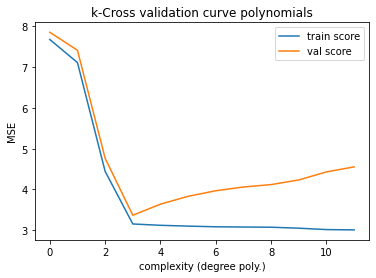

In [79]:
def validation_curve_polynomials(X, y, degree=20, sets=6):
    """Plot the validation curve of polynomial models
    Args:
        X (np.array): X data points
        y (np.array): y data points
        degree (int): degree of the highest polynominal
        sets (int): number of exclusive and exhaustive sets. 
    Returns:
        None."""
    X_sets, y_sets = split_k_sets(X,y,sets)
    CVs = np.zeros(degree)
    CV_MSE = np.zeros((2,degree))
    for i in range(degree):
        CV_MSE[:,i] = k_cross_validation(X_sets, y_sets, i)
        
    plt.plot(np.array(list(range(degree))), CV_MSE[1], label="train score")
    plt.plot(np.array(list(range(degree))), CV_MSE[0], label="val score")
    plt.title(r'k-Cross validation curve polynomials')
    plt.ylabel(r'MSE')
    plt.xlabel(r'complexity (degree poly.)')
    plt.legend()
    plt.show()
            
validation_curve_polynomials(X,y, 12)

The validation curve has a minimum at degree 3, while the training score keeps decreasing with the degree of the polynomial. This means that a higher model complexity as degree 3 overfits the training data, resulting in a rise in the validation score. 
Hence the polynomial used for generating the data is most likely of degree 3. 

## Problem 6 (extra)
### (3 points)

### Gradient descent methods

#### Generate noisy data with a quadratic feature
This is the same data as in Problem 2.

In [81]:
# Generate noisy data with a quadratic feature
# use the following code:
np.random.seed(42)

# X are picked uniform random [0,2]
X = 2 * np.random.rand(100, 1)
# Linear relation to the predicted value, but with Gaussian noise (mean=0, variance=1)
y = 0.5 * X**2 + X + 2 + 0.2 * np.random.randn(100, 1)

#### (a) Batch and stochastic gradient descent
Implement both batch and stochastic gradient descent and use these methods to find the best fit parameters of a quadratic model.
- You might want to tune the learning hyperparameter $\eta$.
- Do 50 epochs for the SGD (each epoch corresponding to using all instances of data once)
- Compare with the solution from Problem 2.

In [82]:
# Implement BGD and use it to find the best-fit parameters
#
# At the end, the following array should contain the 
# best-fit parameters: 
# theta_0 (constant term), theta_1 (linear), theta_2 (quadratic)
theta_bgd = np.array([0., 0., 0.]) # Note the order

def MSE(X, y, theta):
    """
    Compute the mean-squared error for data and a polynomial fit.
    
    Args:
        X: Array of shape (m,1) with 'm' independent data.
        y: Array of shape (m,1) with 'm' dependent data.
        theta: Parameter array [shape (degree+1,)]. 
            The ordering corresponds to the constant term first.
            
    Return:
        MSE (float): Mean-squared error defined as
            MSE = (1/m) * sum_i (y[i] - y_model[i])**2,
            where y_model[i] = \sum_m theta[m]*X[i]**m 
    """
    n = len(X)
    y_model = lambda x: np.sum([theta[i]*x**i for i in range(len(theta))], axis=0)
    MSE = 1/n * np.sum((y - y_model(X))**2)
    return MSE
                       
    
def grad_MSE(X,y,theta):
    """Compute the gradient of the MSE function.
    Args:
        X: Array of shape (m,1) with 'm' independent data.
        y: Array of shape (m,1) with 'm' dependent data.
        theta: Parameter array [shape (degree+1,)]. 
            The ordering corresponds to the constant term first.
    Returns:
        grad_MSE (np.array): the gradient of the MSE function."""
    X_d = np.ones((len(X), len(theta)))
    for i in range(1,len(theta)):
        X_d[:,i] = X[:].reshape((len(X)))**i
    grad = X_d.T @ (y - (X_d @ theta).reshape((len(X), 1)))
    return -2/len(X) * grad.flatten()


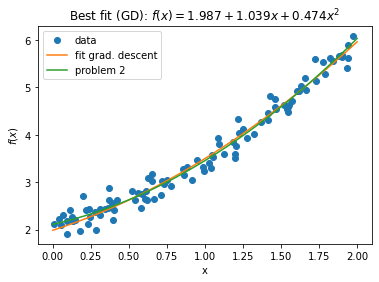

Thetas GD       : theta_0 = 1.987,theta_1 = 1.039,theta_2 = 0.474
Thetas problem 2: theta_0 = 2.112,theta_1 = 0.728,theta_2 = 0.616
MSE GD      : 0.033


In [100]:
def batch_gradient_descent(X, y, degree, step_size, epochs,
                           cost_func=MSE, grad_cost_func=grad_MSE):
    """TODO: docstring"""
    theta = np.random.rand(degree) * 2 - 1
    cost_ar = np.zeros((epochs + 1))
    cost = cost_func(X, y, theta)
    cost_ar[0] = cost
    for i in range(epochs):
        theta_grad = grad_cost_func(X, y, theta)
        theta -= step_size * theta_grad
        cost = cost_func(X, y, theta)
        cost_ar[i+1] = cost
        
    return theta, cost_ar
        
epochs = 50
theta_bgd, cost_ar_bgd = batch_gradient_descent(X,y, 3, 1e-1, epochs)

def compare_fit(X, y, theta, cost):
    plt.figure()
    plt.title(r'Best fit (GD): $f(x) = {:2.3f} + {:2.3f}x +{:2.3f}x^2$'.format(*theta))
    plt.plot(X, y, 'o', label='data')
    xx = np.linspace(0,2)
    plt.plot(xx, theta[0]+xx*theta[1]+xx**2*theta[2], label='fit grad. descent')
    _,_, theta_1 = polynomial_regression([X,X,y,y], 2)
    plt.plot(xx, theta_1[0] + xx*theta_1[1]  + xx**2*theta_1[2], label="problem 2")
    plt.ylabel(r'$f(x)$')
    plt.xlabel(r'x')
    plt.legend()
    plt.show()
    print("Thetas GD       : theta_0 = {:2.3f},theta_1 = {:2.3f},theta_2 = {:2.3f}".format(*theta))
    print("Thetas problem 2: theta_0 = {:2.3f},theta_1 = {:2.3f},theta_2 = {:2.3f}".format(*theta_1))
    print("MSE GD      : {:2.3f}".format(cost))
    #print("MSE probl. 2: {:2.3f)".format(
    
    
compare_fit(X,y,theta_bgd,cost_ar_bgd[-1])

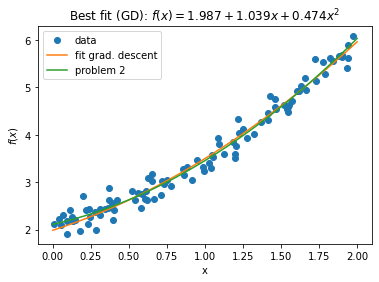

Thetas GD       : theta_0 = 1.987,theta_1 = 1.039,theta_2 = 0.474
Thetas problem 2: theta_0 = 2.112,theta_1 = 0.728,theta_2 = 0.616
MSE GD      : 0.033


In [101]:
# Implement SGD and use it to find the best-fit parameters
#
# At the end, the following array should contain the 
# best-fit parameters: 
# theta_0 (constant term), theta_1 (linear), theta_2 (quadratic)
theta_sgd = np.array([0., 0., 0.]) # Note the order

def stochastic_gradient_descent(X, y, degree, step_size, epochs,
                               cost_func=MSE, grad_cost_func=grad_MSE):
    """TODO: docstring"""
    theta = np.random.rand(degree) * 2 - 1
    cost_ar = np.zeros((epochs))
    cost = cost_func(X, y, theta)
    for i in range(epochs):
        for j in range(len(X)):
            theta_grad = grad_cost_func(X[j], y[j], theta)
            theta -= step_size * theta_grad
        
        cost = cost_func(X, y, theta)
        cost_ar[i] = cost
        
    return theta, cost_ar
        
epochs = 50
theta_sgd, cost_ar_sgd = stochastic_gradient_descent(X, y, 3, .5e-1, epochs)
compare_fit(X,y,theta_bgd, cost_ar[-1])
    

In [102]:
assert theta_bgd.shape ==(3,)
assert not (theta_bgd==0).any()
assert theta_sgd.shape ==(3,)
assert not (theta_sgd==0).any()


#### (b) Mini-batch gradient descent
Implement mini-batch gradient descent and use this method to find the best fit parameters. Details:
- use a mini-batch size of 20%
- perform 50 epochs 
- hint: the `numpy.random.permutation` function might be useful for creating the mini-batches. 
- Compare with the solutions from BGD and SGD.

MBGD: f(x) = 2.011 + 0.994x +0.485x^2
SGD: f(x) = 2.107 + 0.643x +0.692x^2
BGD: f(x) = 1.987 + 1.039x +0.474x^2
MSE MBGD: 0.03277
MSE SGD: 0.03306
MSE BGD: 0.03332


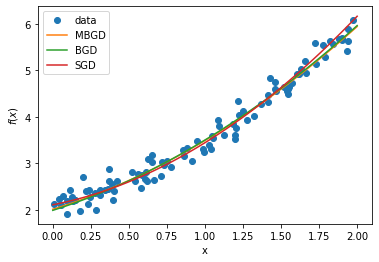

In [108]:
# Implement MBGD and use it to find the best-fit parameters
#
# At the end, the following array should contain the 
# best-fit parameters: 
# theta_0 (constant term), theta_1 (linear), theta_2 (quadratic)
theta_mbgd = np.array([0., 0., 0.]) # Note the order

def minibatch_gradient_descent(X, y, degree, step_size, epochs,
                               cost_func=MSE, grad_cost_func=grad_MSE):
    """TODO: docstring """
    theta = np.random.rand(degree) * 2 - 1
    cost_ar = np.zeros((epochs))
    cost = cost_func(X, y, theta)
    X_sets, y_sets = split_k_sets(X,y,5)
    for i in range(epochs):
        for X_s, y_s in zip(X_sets, y_sets):
            theta_grad = grad_cost_func(X_s, y_s, theta)
            theta -= step_size * theta_grad
        
        cost = cost_func(X, y, theta)
        cost_ar[i] = cost
        
    return theta, cost_ar
        
epochs = 50
theta_mbgd, cost_ar_mbgd = minibatch_gradient_descent(X,y, 3, 1e-1, epochs)
print("MBGD: f(x) = {:2.3f} + {:2.3f}x +{:2.3f}x^2".format(*theta_mbgd))
print("SGD: f(x) = {:2.3f} + {:2.3f}x +{:2.3f}x^2".format(*theta_sgd))
print("BGD: f(x) = {:2.3f} + {:2.3f}x +{:2.3f}x^2".format(*theta_bgd))

print("MSE MBGD: {:2.5f}".format(cost_ar_mbgd[-1]))
print("MSE SGD: {:2.5f}".format(cost_ar_sgd[-1]))
print("MSE BGD: {:2.5f}".format(cost_ar_bgd[-1]))

plt.figure()
plt.plot(X, y, 'o', label="data")
xx = np.linspace(0,2)
plt.plot(xx, theta_mbgd[0]+xx*theta_mbgd[1]+xx**2*theta_mbgd[2], label="MBGD")
plt.plot(xx, theta_bgd[0]+xx*theta_bgd[1]+xx**2*theta_bgd[2],label="BGD")
plt.plot(xx, theta_sgd[0]+xx*theta_sgd[1]+xx**2*theta_sgd[2],label="SGD")
plt.ylabel(r'$f(x)$')
plt.xlabel(r'x')
plt.legend()
plt.show()

In [104]:
assert theta_mbgd.shape ==(3,)
assert not (theta_mbgd==0).any()


#### (c) Convergence
Compare the convergence pattern for the BGD, SGD and MGD, i.e. plot the path towards the optimal set of parameters. 
- Note that the path is in 3D (since there are three parameters in our quadratic model). You can plot 2D projections of the path.

In [88]:
def mbgd_thetas(X, y, degree, step_size, epochs,thetas_init,
                               cost_func=MSE, grad_cost_func=grad_MSE):
    """TODO: docstring """
    theta = thetas_init
    theta_ar = np.zeros((epochs*4,3))
    cost = 0.0
    X_sets, y_sets = split_k_sets(X,y,5)
    for i in range(epochs):
        for j, (X_s, y_s) in enumerate(zip(X_sets, y_sets)):
            theta_grad = grad_cost_func(X_s, y_s, theta)
            theta -= step_size * theta_grad
            theta_ar[i*4+j] = theta
        cost = cost_func(X, y, theta)
        
        
    return theta, cost, theta_ar

def sgd_thetas(X, y, degree, step_size, epochs,thetas_init,
                               cost_func=MSE, grad_cost_func=grad_MSE):
    """TODO: docstring """
    theta = thetas_init
    theta_ar = np.zeros((epochs*len(X),3))
    cost = 0.0
    for i in range(epochs):
        for j in range(len(X)):
            theta_grad = grad_cost_func(X[j], y[j], theta)
            theta -= step_size * theta_grad
            theta_ar[i*len(X) + j] = theta
        cost = cost_func(X, y, theta)
        
    return theta, cost, theta_ar

def bgd_thetas(X, y, degree, step_size, epochs, thetas_init,
                           cost_func=MSE, grad_cost_func=grad_MSE):
    """TODO: docstring """
    theta = thetas_init
    theta_ar = np.zeros((epochs,3))
    cost = 0.0
    for i in range(epochs):
        theta_grad = grad_cost_func(X, y, theta)
        theta -= step_size * theta_grad
        cost = cost_func(X, y, theta)
        theta_ar[i] = theta
    return theta, cost, theta_ar

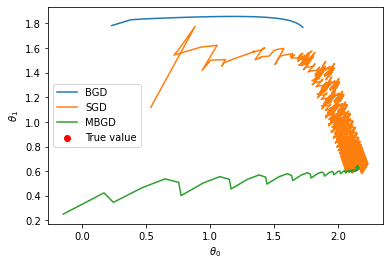

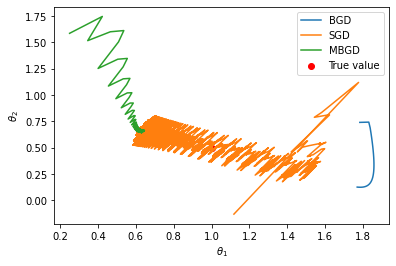

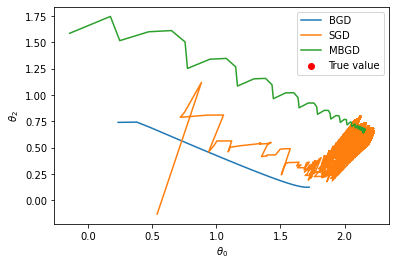

In [111]:
epochs = 50
step_size = 1e-1
deg = 3

thetas_init1 = np.random.rand(deg) * 2 - 1
thetas_init2 = np.random.rand(deg) * 2 - 1
thetas_init3 = np.random.rand(deg) * 2 - 1

theta_bgd, cost_bgd, theta_bgd_ar = bgd_thetas(X,y,deg, step_size,epochs, thetas_init1)
theta_sgd, cost_sgd, theta_sgd_ar = sgd_thetas(X,y,deg, step_size/2,epochs,thetas_init2)
theta_mbgd, cost_mbgd, theta_mbgd_ar = mbgd_thetas(X,y,deg, step_size,epochs,thetas_init3)

def plot_projection(thetas, axes=(1,2)):
    labels = ["BGD", "SGD", "MBGD"]
    for i in range(len(thetas)):
        plt.plot(thetas[i][:,axes[0]], thetas[i][:,axes[1]], label=labels[i])
    theta_true = [2,1,.5]
    plt.scatter(theta_true[axes[0]], theta_true[axes[1]], color='red', label='True value')
    
    plt.ylabel(r'$\theta_{:}$'.format(axes[1]))
    plt.xlabel(r'$\theta_{:}$'.format(axes[0]))
    plt.legend()
    plt.show()
    
thetas = [theta_bgd_ar, theta_sgd_ar, theta_mbgd_ar]
        
plot_projection(thetas, axes=(0,1))
plot_projection(thetas, axes=(1,2))
plot_projection(thetas, axes=(0,2))